George is the content head of a prestigious book publishing company. He needs to decide on which type/genre of book to publish next so that it can become a bestseller. Now you as the Data Analyst have chosen to research how users respond to different types of genres. This is the opportunity for you to shine like a star and show your data analytics skill. Let’s start the process by performing EDA on the provided Dataset.

[Dataset](https://docs.google.com/spreadsheets/d/1bCYeC2tX1-Lkp-zeAkmRRckM4m8vR8CnHxK2aJXSVIs/edit#gid=1322732088)


In this work, exploratory data analysis has been carried out on the dataset Amazon's Top 50 bestselling books from 2009 to 2019.

FEATURES:

Name - Name of the Book

Author - The author of the Book

User Rating - Amazon User Rating

Reviews - Number of written reviews on amazon

Price - The price of the book (As at 13/10/2020)

Year - The Year(s) it ranked on the bestseller

Genre - Whether fiction or non-fiction

## Understand your dataset:

In this section we are going to get some basic information about our dataset like:
- Read the dataset
- Get the basic info about the data set.
- Find out about the missing values.
- Describe the numerical values on various parameters.
- Datatype of columns




In [33]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("book.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Data types

In [4]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

### Missing Values

In [6]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

### Handling Duplicates

Check if the columns contains words in different case and extra spaces.

Also check if there are the same author names but with different spellings.

In [8]:
df[df.duplicated()].count()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

After handling missing values are removing duplicates, the data contains 350 different books written by 246 authors. All books are presented in two categories (Non Fiction, Fiction).

In [10]:
df.count()

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64

## Book Ratings

Ranking by rating gives a relatively high number of max (4.9) ratings, however, we can see significant differences in the number of reviews, with some books having just over 3000 reviews while some have about 20,000.

A weighted rating, that takes into consideration the number of reviews, will be a better option for this ranking.



> **Weighted Average Rating = (v/(v+m) * R) + (m/(m+v) * C)**




where R = average rating for the book

v = number of reviews for the book

m = minimum reviews required to be listed in the best seller list

C = the mean rating in the dataset

While a number of rows in the weighted rating column can still be rounded up to 4.9, there is enough of a difference between the various books that they can be ranked.

### Add Weighted Average Rating Column to the dataset

In [13]:
R = df['User Rating']
v = df.Reviews
m = df.Reviews.min()
C = df['User Rating'].mean()

df["WAR"] = (v/(v+m) * R) + (m/(m+v) * C)

In [14]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,WAR
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699826
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699841
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699859
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799127


## Visualizing the data

Let's create new dataframes based on:

### The average rating of authors

In [21]:
author_rating = df.groupby('Author')['WAR'].mean().sort_values(ascending = False)
author_rating.head()

Author
Sarah Young        4.899469
Eric Carle         4.899468
Bill Martin Jr.    4.899275
Jill Twiss         4.899126
Nathan W. Pyle     4.898894
Name: WAR, dtype: float64

### The number of books written by authors

In [23]:
author_book_count = df.Author.value_counts().sort_values(ascending = False)
author_book_count.head()

Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
Name: Author, dtype: int64

### The number of reviews for books

In [29]:
books_with_most_reviews = df.loc[:, ['Name', 'Reviews']].sort_values(by = 'Reviews', ascending = False)
books_with_most_reviews

,Name,Reviews
534,Where the Crawdads Sing,87841
382,The Girl on the Train,79446
383,The Girl on the Train,79446
32,Becoming,61133
33,Becoming,61133
...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,440
512,True Compass: A Memoir,438
121,George Washington's Sacred Fire,408
300,Soul Healing Miracles: Ancient and New Sacred ...,220


### The number of books by genre

In [30]:
df.groupby("Genre")["Name"].count()

Genre
Fiction        240
Non Fiction    310
Name: Name, dtype: int64

## Statistical Testing

### Is the dataset distributed normally?


### Average and median book ratings

In [31]:
df = df.rename(columns = {'User Rating': 'Rating'})
df.Rating.mean(), df.Rating.median()

(4.618363636363637, 4.7)

### If there are outliers in the dataset.

In [32]:
df.count()

Name       550
Author     550
Rating     550
Reviews    550
Price      550
Year       550
Genre      550
WAR        550
dtype: int64

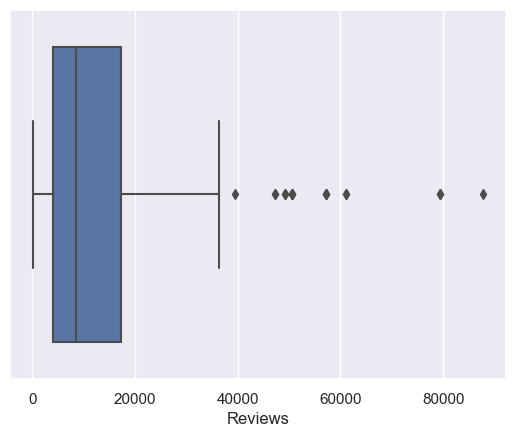

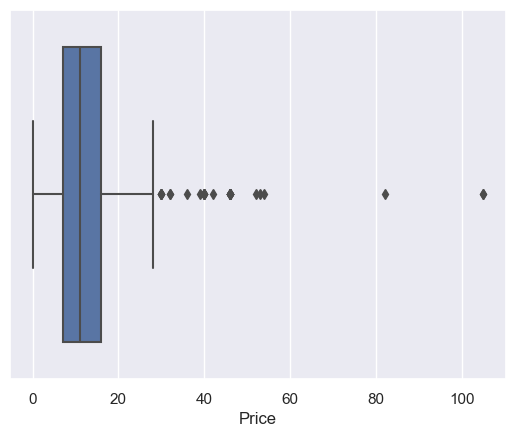

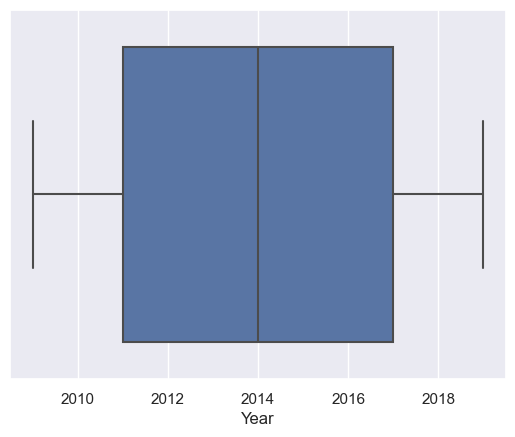

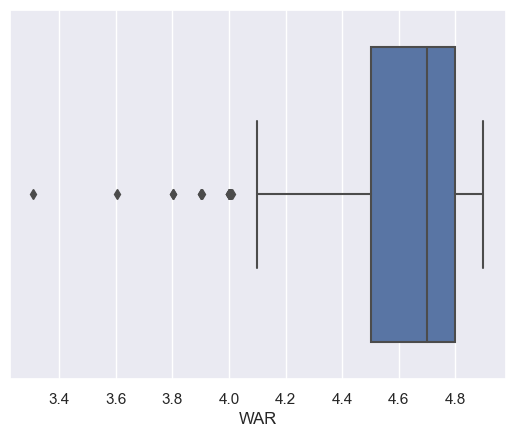

In [36]:
sns.boxplot(x=df['Reviews'])
plt.show()
sns.boxplot(x=df['Price'])
plt.show()
sns.boxplot(x=df['Year'])
plt.show()
sns.boxplot(x=df['WAR'])
plt.show()

### Correlation between User ratings, reviews and price.

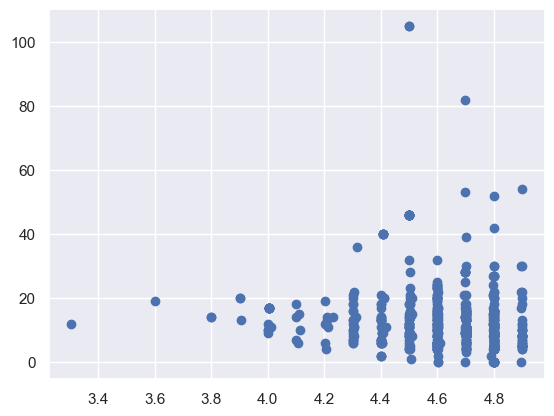

-0.13308628728088


In [39]:
plt.scatter(df.WAR, df.Price)
plt.show()
ratingVSprice = df.Rating.corr(df.Price)
print(ratingVSprice)

To this point, we have a great level of understanding of our dataset. Now we can easily move to our main question:

**Do users evaluate books differently depending on the genre.**

We can divide this question into parts:


### Formulate the null and alternative hypotheses.

### Checking the distribution for normality.

### Form two samples for testing.

### Carry out hypothesis testing.